## IRIS Task

In [90]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
setosaTrainingVec = []
versicolorTrainingVec = []
virginicaTrainingVec = []

setosaTestVec = []
versicolorTestVec = []
virginicaTestVec = []

TrainingSize = 30

with open('iris_data/class_1', 'r') as file:
    for line in file:
        if len(setosaTrainingVec) < TrainingSize:
            setosaTrainingVec.append([float(x) for x in line.split(',')])
        else:
            setosaTestVec.append([float(x) for x in line.split(',')])

with open('iris_data/class_2', 'r') as file:
    for line in file:
        if len(versicolorTrainingVec) < TrainingSize:
            versicolorTrainingVec.append([float(x) for x in line.split(',')])
        else:
            versicolorTestVec.append([float(x) for x in line.split(',')])

with open('iris_data/class_3', 'r') as file:
    for line in file:
        if len(virginicaTrainingVec) < TrainingSize:
            virginicaTrainingVec.append([float(x) for x in line.split(',')])
        else:
            virginicaTestVec.append([float(x) for x in line.split(',')])

In [92]:
setosaTrainingVec = np.array(setosaTrainingVec)
versicolorTrainingVec = np.array(versicolorTrainingVec)
virginicaTrainingVec = np.array(virginicaTrainingVec)

setosaTestVec = np.array(setosaTestVec)
versicolorTestVec = np.array(versicolorTestVec)
virginicaTestVec = np.array(virginicaTestVec)

X = np.concatenate((setosaTrainingVec, versicolorTrainingVec, virginicaTrainingVec), axis=0)
X_test = np.concatenate((setosaTestVec, versicolorTestVec, virginicaTestVec), axis=0)

In [93]:
np.random.seed(42)

x = np.array([-3, -5, 3, 5])
W = np.random.uniform(-1, 1, (3,4))
T = np.concatenate((np.tile([1,0,0], (30,1)), np.tile([0,1,0], (30,1)), np.tile([0,0,1], (30,1))))

w0 = np.array([0, 0, 0])

def g(x, W): # Eq 20 on vector form classification compendium
    zk = np.matmul(W, x) + w0
    gk = 1 / (1 + np.exp(-zk))
    return gk

print(g(x, W))

[0.2016787  0.99851996 0.2963353 ]


In [94]:
def MSE(X, T, W): # Eq 19 in classification compendium
    
    mseSum = 0
    for i in range(np.size(X, 0)):
        xk = X[i,:]
        tk = T[i,:]
        gk = g(xk, W)
        
        mseSum += (1/2)* np.linalg.norm((gk - tk), ord=2)
    
    return mseSum

def gradMSE(X, T, W): # Eq 22
    
    gradMSESum = np.zeros((3,4))
    
    for i in range(np.size(X, 0)):
        xk = X[i,:]
        tk = T[i,:]
        gk = g(xk, W)
        
        a = np.multiply((gk - tk), gk)
        b = np.multiply(a, np.ones(3).T - gk)

        gradMSESum += np.outer(b, xk)

    return gradMSESum

print(MSE(X, T, W))
print(gradMSE(X, T, W))
    

51.47818952219319
[[ 9.24970645e+00  3.95890623e+00  7.35004440e+00  2.44379142e+00]
 [-3.08520137e-02 -1.40721532e-02 -2.18032215e-02 -6.78495517e-03]
 [ 8.79488529e+00  8.82813001e+00 -5.75938218e+00 -3.75313291e+00]]


### Linesearch

In [95]:
tolerance = 1e-4
alpha = 0.05

np.random.seed(10)
W = np.random.uniform(-1, 1, (3,4))

# Condition on grad W
# while np.linalg.norm(gradMSE(X, T, W), ord='fro') > tolerance:
#     W = W - alpha * gradMSE(X, T, W)
#     print(f"Norm: {np.linalg.norm(gradMSE(X, T, W), ord='fro')}, MSE: {MSE(X, T, W)}")
    

# Condition on change in W
# W_old = W + 10*np.ones((3,4))
# while np.linalg.norm(W-W_old, ord='fro') > tolerance:
#     print(f"Change in W: {np.linalg.norm(W-W_old, ord='fro')}, MSE: {MSE(X, T, W)}")
#     W_old = W
#     W = W - alpha * gradMSE(X, T, W)
    
# Condition on MSE
while MSE(X, T, W) > 29:
    print(f"Change in W: {np.linalg.norm(W-W_old, ord='fro')}, MSE: {MSE(X, T, W)}")
    W_old = W
    W = W - alpha * gradMSE(X, T, W)

print(MSE(X, T ,W))


Change in W: 14.94890112189232, MSE: 47.984426069075965
Change in W: 0.9188913062887718, MSE: 40.299065189355545
Change in W: 3.0904545116343733, MSE: 41.469039155267396
Change in W: 1.0203760762902958, MSE: 44.769538443852575
Change in W: 0.16960287081959094, MSE: 44.196015985840546
Change in W: 0.5345524302815768, MSE: 39.24983265273676
Change in W: 1.7913972930618693, MSE: 44.99645443039164
Change in W: 0.002953753458476441, MSE: 44.996366017660556
Change in W: 0.0030302390599805753, MSE: 44.996272934628784
Change in W: 0.0031107849635241243, MSE: 44.9961748016115
Change in W: 0.00319572217813798, MSE: 44.99607119670778
Change in W: 0.0032854185882172497, MSE: 44.99596164977811
Change in W: 0.003380284221646517, MSE: 44.99584563536302
Change in W: 0.0034807774453997774, MSE: 44.995722564318704
Change in W: 0.003587412284437868, MSE: 44.995591773891626
Change in W: 0.003700767108353421, MSE: 44.99545251588152
Change in W: 0.0038214949928181683, MSE: 44.99530394244937
Change in W: 0.0

# Verification of model

0 [1.27040254e-06 3.93099740e-02 6.56929168e-18]
0 [3.08133043e-06 1.88420906e-01 4.39015960e-16]
0 [3.70999178e-06 5.41950754e-02 2.10207038e-16]
0 [3.15994137e-06 6.35879844e-02 4.41709731e-15]
0 [1.25832866e-06 1.98074542e-02 7.14438831e-18]
0 [2.65073243e-07 9.84107394e-03 6.88382747e-18]
0 [2.53263246e-06 1.47600274e-02 7.13337476e-16]
0 [1.32793448e-06 4.67765776e-02 5.58833189e-17]
0 [6.38170479e-06 9.19092395e-02 2.12073330e-14]
0 [2.29203690e-06 1.48400323e-01 2.71106601e-16]
0 [5.58050895e-07 3.42472229e-02 7.07013026e-19]
0 [1.37487964e-06 2.82425351e-02 5.17002142e-16]
0 [3.60840535e-06 1.76286374e-01 3.77965014e-16]
0 [1.21379095e-05 5.80944171e-02 6.80743665e-16]
0 [4.33470089e-07 2.58699333e-02 5.93464078e-22]
0 [1.46022047e-07 2.31176829e-03 8.72316397e-21]
0 [6.01289571e-07 1.03155427e-02 1.84895230e-19]
0 [1.22284909e-06 3.32230684e-02 1.47668987e-17]
0 [2.18808481e-07 3.84453053e-02 7.51845558e-19]
0 [6.76044865e-07 8.73808137e-03 6.47334501e-18]
0 [5.46113553e-07 1.

<Axes: >

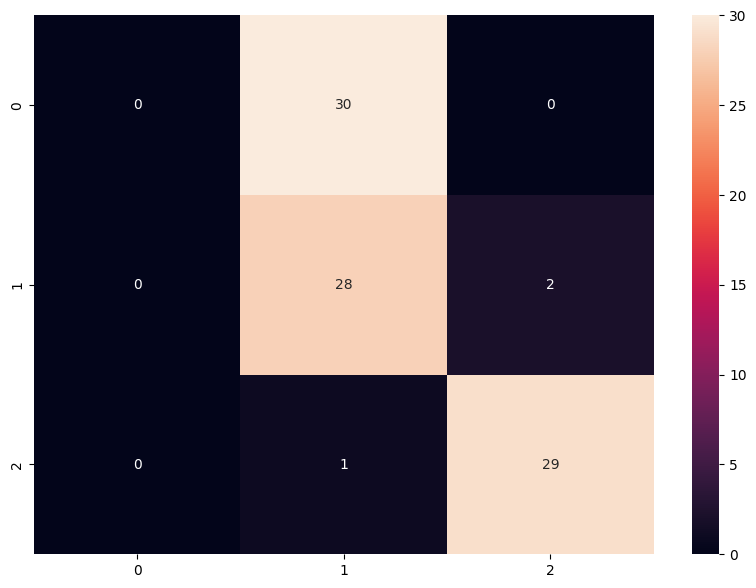

In [96]:
import seaborn as sn

T_test = np.concatenate((np.tile([1,0,0], (20,1)), np.tile([0,1,0], (20,1)), np.tile([0,0,1], (20,1))))

# x-axis: true class
# y-axis: predicted class
confMatrix = np.zeros((3,3))

for i in range(np.size(X, 0)):
    x = X[i, :]
    t = T[i, :]
    true_class = np.argmax(t)
    predicted_class = np.argmax(g(x, W))
    print(true_class, g(x, W))
    confMatrix[true_class][predicted_class] += 1

print(confMatrix)

plt.figure(figsize = (10,7))
sn.heatmap(confMatrix, annot=True)
